# Librairie `matplotlib` & interface graphique

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## Higgs en $\gamma\gamma$

Le 4 juillet 2012, les expériences ATLAS et CMS, menées au Grand collisionneur de hadrons (LHC), ont annoncé qu’elles avaient toutes deux observé une nouvelle particule dont la masse se situait dans la région des 126 GeV. Cette particule présente des caractéristiques compatibles avec celles du boson de Higgs prédit par le Modèle standard. Le boson de Higgs, tel que le décrit ce modèle, est la manifestation la plus simple du mécanisme de Brout-Englert-Higgs qui permet, notamment, d'expliquer théoriquement la masse des particules élémentaires.

Le 8 octobre 2013, le prix Nobel de physique a été attribué conjointement à François Englert et à Peter Higgs « pour la découverte théorique d’un mécanisme contribuant à notre compréhension de l’origine de la masse des particules subatomiques, une théorie qui s’est confirmée récemment, lorsque les expériences ATLAS et CMS, menées au Grand collisionneur de hadrons du CERN, ont découvert la particule prédite. »

Pour détecter le boson de Higgs, les physiciens des expériences ATLAS et CMS étudient notamment la désintégration de cette particule en une paire de photons $\gamma$. On peut alors mesurer le nombre d'événements comprenant uniquement deux photons et le comparer à un modèle dans lequel le boson de Higgs n'existe pas. Une différence significative entre données et modèle signe alors l'existence d'une nouvelle particule.

Les données [`higgs-gg.csv`](https://raw.githubusercontent.com/xgarrido/licence_python_teaching/master/td/data/higgs-gg.csv) représentent les résultats obtenus par l'expérience ATLAS au cours des années 2011/2012. Dans ce fichier, figure en première colonne l'énergie des deux photons exprimée en GeV, le nombre de paire di-photons observées en deuxième colonne et l'incertitude sur ce nombre en troisième colonne. Dans cet exercice, on cherche à reproduire la figure ci-dessous publiée dans [*Phys. Rev. Letter B716* (2012)](https://arxiv.org/abs/1207.7214) et annonçant la découverte d'une nouvelle particule.

![](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/figures/higgs_gg.png)

- Représenter le nombre d'événements di-photons en fonction de l'énergie. On
  oubliera pas d'intituler les axes de cette figure afin d'y faire figurer toute
  information pertinente.

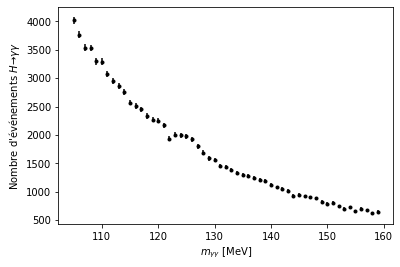

In [3]:
%matplotlib inline
import numpy as np

x, y, yerr = np.loadtxt("./data/higgs-gg.csv", delimiter=",", unpack=True)

import matplotlib.pyplot as plt

plt.errorbar(x, y, yerr=yerr, fmt=".k", label="ATLAS data")
plt.ylabel(r"Nombre d'événements $H\to\gamma\gamma$")
plt.xlabel(r"$m_{\gamma\gamma}$ [MeV]");

- Représenter le modèle suivant

    \begin{align*}
      y_\text{modèle} = -1.668\,10^{-2}x^3 + 7.697x^2 + -1208.9x + 6.527\,10^{4}
    \end{align*}

  Calculer la valeur du $\chi^2$ où

    \begin{align*}
      \chi^2=\sum_i\frac{\left(y_i-y_\text{modèle}(x_i)\right)^2}{\sigma_{y_i}^2}
    \end{align*}

  et la diviser par le nombre de degrés de liberté qui correspond au nombre de
  points expérimentaux moins le nombre de paramètres du modèle. Pour
  information, une valeur de $\chi^{2}$/ndof voisine de 1 démontre l'adéquation
  statistique entre données et modèle.

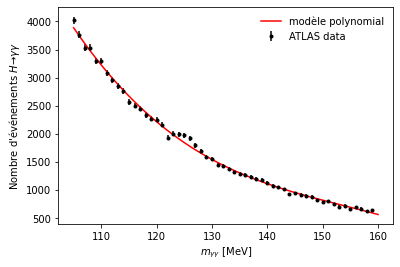

In [20]:
def model(x, parameters=[6.527e4, -1208.9, 7.697, -1.668e-2]):
    return np.sum([p * x ** i for i, p in enumerate(parameters)], axis=0)


xmodel = np.linspace(105, 160, 100)
plt.plot(xmodel, model(xmodel), "-r", label="modèle polynomial")
plt.errorbar(x, y, yerr=yerr, fmt=".k", label="ATLAS data")
plt.ylabel(r"Nombre d'événements $H\to\gamma\gamma$")
plt.xlabel(r"$m_{\gamma\gamma}$ [MeV]")
plt.legend();

In [5]:
dev = (y - model(x)) / yerr
chi2ndof = np.sum(dev ** 2) / (len(dev) - 4)
chi2ndof

1.508688175426223

- Représenter dans une sous figure, la différence entre le modèle et les données
  puis normaliser cette différence par rapport à l'erreur sur chacun des points
  expérimentaux. Une découverte en physique des particules est établie lorsque
  le nombre d'écart-type $\sigma$ entre données expérimentales et modèle est
  supérieur à 5. Isoler graphiquement les points expérimentaux pour lesquels la
  déviation est supérieure à 3$\sigma$. Déterminer enfin la valeur maximale de
  cette déviation en nombre de $\sigma$ et affirmer ou non avoir découvert le
  boson de Higgs. Le cas échéant, donner la masse de cette particule.

Masse du boson de Higgs = 126.0 GeV


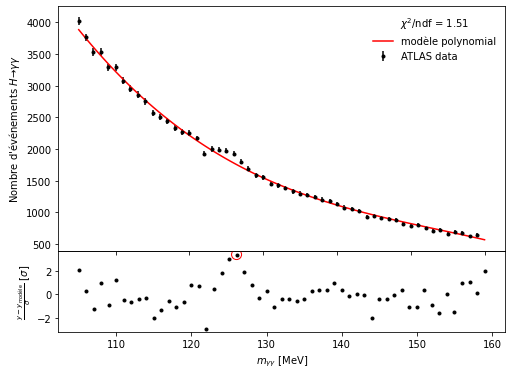

In [6]:
plt.figure(figsize=(8, 6))
grid = plt.GridSpec(4, 1, hspace=0, wspace=0)
main = plt.subplot(grid[0:3], xticklabels=[])
main.errorbar(x, y, yerr=yerr, fmt=".k", label="ATLAS data")
main.plot(xmodel, model(xmodel), "-r", label="modèle polynomial")
main.set_ylabel(r"Nombre d'événements $H\to\gamma\gamma$")
main.legend(title=r"$\chi^2/$ndf = {:.2f}".format(chi2ndof))

sub = plt.subplot(grid[3])
sub.errorbar(x, dev, fmt=".k")
sub.set_ylabel(r"$\frac{y-y_\mathrm{modèle}}{\sigma}$ [$\sigma$]")
sub.set_xlabel(r"$m_{\gamma\gamma}$ [MeV]")

mask = dev > 3
sub.scatter(x[mask], dev[mask], edgecolors="red", c="none", s=100)

print("Masse du boson de Higgs = {} GeV".format(x[mask][0]))

## Interfaces graphiques 

### Production de $^{11}$C

Reprendre l'exercice sur la variation du nombre de noyaux de carbone 11 en
ajoutant à la représentation initiale, trois *sliders* respectivement $n_i$,
$T_{1/2}$ et $t_0$ et faire en sorte que la figure se reconstruise à chaque
nouvelle valeur de ces paramètres.

In [1]:
%matplotlib qt
import numpy as np

# Définition des constantes du problème
ni = 3e8  # noyaux/s
T12 = 20.36  # min
t0 = 3  # hours


def n(t, ni=ni, t0=t0, T12=T12):
    T12 /= 60  # hours
    ni *= 3600  # noyaux/h
    l = np.log(2) / T12
    conds = [t <= t0, t > t0]
    funcs = [
        lambda t: ni / l * (1 - np.exp(-l * t)),
        lambda t: ni / l * (1 - np.exp(-l * t0)) * np.exp(-l * (t - t0)),
    ]
    return np.piecewise(t, conds, funcs)


t = np.linspace(0, 10, 1000)  # hours

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
(l,) = plt.plot(t, n(t))
plt.xlabel("temps [heures]")
plt.ylabel(r"$n(^{11}\mathrm{C})$")

# Définition des sous-figures où afficher les sliders
axni = plt.axes([0.25, 0.10, 0.65, 0.03])
axt12 = plt.axes([0.25, 0.15, 0.65, 0.03])
axt0 = plt.axes([0.25, 0.20, 0.65, 0.03])

plt.subplots_adjust(bottom=0.35)

from matplotlib.widgets import Slider

sni = Slider(axni, r"$n_i [\times10^8]\mathrm{/s}$", 1, 10, valinit=ni / 1e8)
st12 = Slider(axt12, r"$T_{1/2}$ [min]", 1, 60, valinit=T12)
st0 = Slider(axt0, r"$t_{0}$ [h]", 1, 10, valinit=t0)


def update(val):
    nx = n(t, sni.val * 1e8, st0.val, st12.val)
    l.set_ydata(nx)
    ax.set_ylim(ax.get_ylim()[0], 1.1 * np.max(nx))
    fig.canvas.draw_idle()


sni.on_changed(update)
st12.on_changed(update)
st0.on_changed(update);

### Distribution spatiale de photons émis depuis une source en mouvement
On peut montrer (*cf.* TD Relativité) que la distribution de photons émis depuis une source en
mouvement relativiste s'écrit

\begin{align*}
    \frac{\text{d} N}{N_0}&=f(\theta)\cdot\frac{\text{d}\Omega}{4\pi}\\
    &=\frac{1-\beta^2}{(1-\beta\cos\theta)^2}\cdot\frac{\text{d}\Omega}{4\pi}
\end{align*}

où $\theta$ est l'angle zénithal et $\text{d}\Omega=\sin\theta\text{d}\theta\text{d}\phi$ dans le
référentiel statique de l'observateur. Représenter la fonction $f(\theta)$ en représentation polaire
puis ajouter un *slider* permettant de faire varier la vitesse $\beta=\frac{V}{c}$ de la source par
rapport à l'observateur.

In [2]:
import numpy as np


def f(theta, beta):
    return (1 - beta ** 2) / (1 - beta * np.cos(theta)) ** 2


r = np.arange(0, 1, 0.0001)
theta = 2 * np.pi * r

import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
plt.subplots_adjust(bottom=0.25)

(l,) = ax.plot(theta, f(theta, beta=0))
ax.set_rticks([])


def update(val):
    y = f(theta, beta=val)
    l.set_ydata(y)
    ax.set_ylim(0, 1.1 * np.max(y))
    fig.canvas.draw_idle()


# Définition des sous-figures où afficher les sliders
axbeta = plt.axes([0.15, 0.10, 0.75, 0.03])
from matplotlib.widgets import Slider

sbeta = Slider(axbeta, r"$\beta$", 0, 0.999999, valinit=0)
sbeta.on_changed(update);